# Exercises:

**Note: ** Make sure you have read the *What is Probability?* notebook before attempting these exercises.

In this excercise you will write code to estimate the probability that $n$ flips of a fair coin will result in number of `"heads"` between $k_1$ and $k_2$.

You should write the body of two functions:
1. **`seq_sum`**: generates a random sequence of coin flips and counts the number of heads.
2. **`estimate_prob`**: Using calls to `seq_sum`, estimate the probability of the number of heads being between $k_1$ and $k_2$. 


### Notebook Setup:

The folowing magic command downloads many python packages like *numpy* and allows the notebooks to plot graphs with *matplotlib*. 

<font color="red">**DO NOT**</font> import other packages. You already have all the packages you need.


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Specifically, you can now use `random.rand(x)` which for some $x \in N$ generates $x$ random numbers. You **will** use this command in your homework.

In [ ]:
random.rand()

0.9419415539710517

In [ ]:
random.rand(4)

array([0.34026984, 0.63964304, 0.55346499, 0.25229773])

##  Exercise 1:

Write a function, **seq_sum**, which generates $n$ random coin flips from a fair coin and then returns the number of heads. A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$ 

The output type should be a numpy integer, **hint:** use `random.rand()` 

<font  style="color:blue"> * **Code:** *</font>
```python
x = seq_sum(100)
print x
print [seq_sum(2) for x in range(20)]
```


<font  style="color:magenta"> * **Output:** *</font>
```
49
[0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1]
```

* Write your code for seq_sum in the cell below

In [ ]:
# modify this cell
#import random 

def seq_sum(n):
    """ input: n, generate a sequence of n random coin flips
        output: return the number of heads 
        Hint: For simplicity, use 1,0 to represent head,tails
    """
    #
    # YOUR CODE HERE
    #
    c_f = 2*(random.rand(n)>0.5)-1
#    print(c_f)
    count=0
    for i in range(len(c_f)):
        if c_f[i]>0:
            count += 1
    return count

* if the following cell runs without error you receive some points.

In [ ]:
# checking function 

x = seq_sum(100)
print(x)
print([seq_sum(2) for x in range(20)])
assert unique([seq_sum(2) for x in  range(0,200)]).tolist() == [0, 1, 2]

#
# AUTOGRADER TEST - DO NOT REMOVE
#


47
[2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2]


## Exercise 2:

Write a function, **estimate_prob**, that uses **seq_sum** to estimate the following probability:

$$ P(\; k_1 <= \text{number of heads in $n$ flips} < k_2 ) $$

The function should estimate the probability by running $m$ different trials of **`seq_sum(n)`**, probably using a *`for`* loop.

In order to receive full credit **estimate_prob** <font color="red">MUST</font> call **seq_sum** (aka: seq_sum is located inside the **estimate_prob** function)

<font  style="color:blue"> * **Code:** *</font>
```python
x = estimate_prob(100,45,55,1000)
print x
print type(x)
```

<font  style="color:magenta"> * **Output:** *</font>
```
0.686
<type 'float'>
```

In [ ]:
# Modify this cell

def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    #
    # YOUR CODE HERE
    #
    heads=[]
    for i in range(m):
        heads.append(seq_sum(n))
    avg = average(heads)
    count = 0
    for i in range(len(heads)):
        if heads[i]>=k1 and heads[i]<k2:
            count += 1.
    return (count/len(heads))

In [ ]:
# this is a small sanity check
# the true check for this function is further down

x = estimate_prob(100,45,55,1000)
print(x)
assert 'float' in str(type(x))

0.68


### Estimate vs. True Probability

We can now check how to see how close these estimates are to the true probabilities.

### Helper Functions

These helper functions are used to calculate the actual probabilities. They are used to test your code.

It is not required that you understand how they work.

In [ ]:
def calc_prob(n,k1,k2):
    """Calculate the probability using a normal approximation"""
    n=float(n);k1=float(k1);k2=float(k2)
    z1=(k1-0.5*n)/(sqrt(n)/2)
    z2=(k2-0.5*n)/(sqrt(n)/2)
    return (erf(z2/sqrt(2))-erf(z1/sqrt(2)))/2

from math import erf,sqrt
def evaluate(n,q1,q2,m,r=100):
    """Run calc_range many times and test whether the estimates are consistent with calc_prob"""
    k1=int(q1*n)
    k2=int(q2*n)
    p=calc_prob(n,k1,k2)
    std=sqrt(p*(1-p)/m)
    print('computed prob=%5.3f, std=%5.3f'%(p,std))

    L=[estimate_prob(n,k1,k2,m) for i in range(r)]
    med=np.median(L)
    print('ran estimator %d times, with parameters n=%d,k1=%d,k2=%d,m=%d'%(r,n,k1,k2,m))
    print('median of estimates=%5.3f, error of median estimator=%5.3f, std= %f5.3'%(med,med-p,std))
    return L,med,p,std,abs((med-p)/std)

In [ ]:
def test_report_assert(n,q1,q2,m,r=100):
    k1=int(q1*n)
    k2=int(q2*n)
    L,med,p,std,norm_err=evaluate(n,q1,q2,m,r=100)
    hist(L);
    plot([p,p],plt.ylim(),'r',label='true prob')
    plot([med,med],plt.ylim(),'k',label='median of %d estimates'%r)
    mid_y=mean(plt.ylim())
    plot([p-std,p+std],[mid_y,mid_y],'g',label='+-std')
    legend();
    print('normalized error of median=',norm_err,'should be <1.0')
    title('r=%d,n=%d,k1=%d,k2=%d,m=%d,\nnorm_err=%4.3f'%(r,n,k1,k2,m,norm_err))
    assert norm_err<1.0

### Testing your Functions

* We now test your functions. The graphs below show how close your estimated probability is to the true probability for various values of $k_1$ and $k_2$. You can see that your answer is never exactly the correct probability. 
* For full credit, the code below must run without error.

#### test no. 1
None
computed prob=0.954, std=0.021
ran estimator 100 times, with parameters n=100,k1=40,k2=60,m=100
median of estimates=0.960, error of median estimator=0.006, std= 0.0208405.3
normalized error of median= 0.2639299423240256 should be <1.0
#### test no. 2
None
computed prob=0.159, std=0.037
ran estimator 100 times, with parameters n=100,k1=55,k2=100,m=100
median of estimates=0.180, error of median estimator=0.021, std= 0.0365355.3
normalized error of median= 0.5842204699465866 should be <1.0
#### test no. 3
None
computed prob=0.146, std=0.035
ran estimator 100 times, with parameters n=100,k1=47,k2=49,m=100
median of estimates=0.140, error of median estimator=-0.006, std= 0.0353595.3
normalized error of median= 0.18346390889487418 should be <1.0
#### test no. 4
None
computed prob=1.000, std=0.000
ran estimator 100 times, with parameters n=1000,k1=400,k2=600,m=100
median of estimates=1.000, error of median estimator=0.000, std= 0.0000025.3
normalized error of median= 0.00

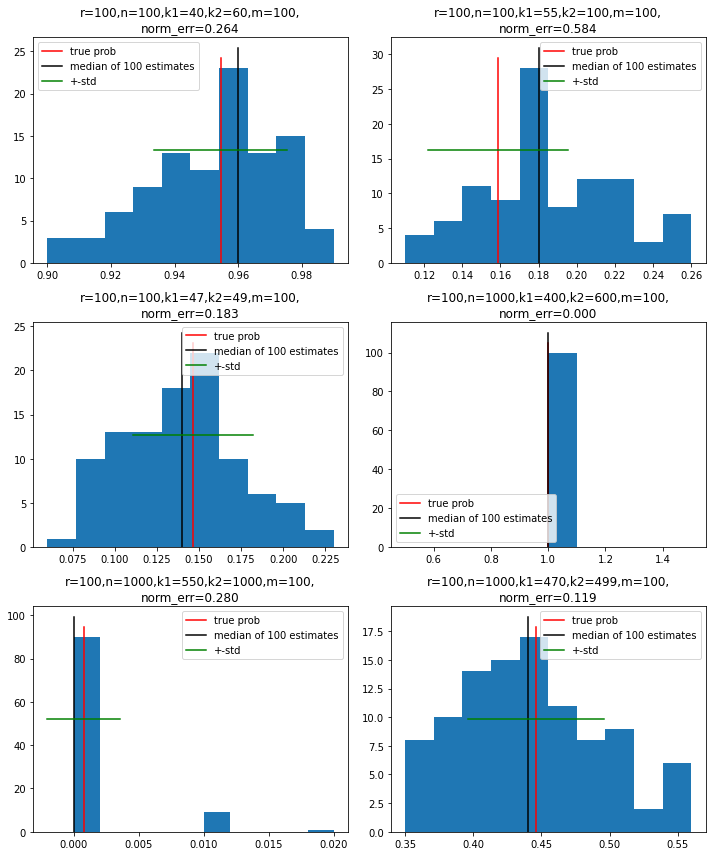

In [ ]:
# checking functions

m=100
i=1
figure(figsize=[10,12])
for n in [100,1000]:
    for q1,q2 in [(0.4,0.6),(0.55,1.00),(0.47,0.499)]:
        fig=subplot(3,2,i)
        print(print ('#### test no.',i))
        i+=1
        test_report_assert(n,q1,q2,m,r=100)
tight_layout()

In [ ]:
# checking functions 

def seq_sum(n):
    #Log.append(n)
    s=sum(random.rand(n)>0.5)
    Log.append((n,s))
    return s

n,k1,k2,m = 100,45,50,1000
for r in range(10):
    Log=[]
    a=estimate_prob(n,k1,k2,m)
    b=float(sum([(s>=k1 and s<k2) for n,s in Log]))/m
    n_correct=sum(nn==100 for nn,s in Log)
    assert a==b, "estimate is incorrect. should be %4f, instead is %4f"%(b,a)
    assert m==len(Log), 'should call seq_sum %d times, called it %d times'%(m,len(Log))
    assert m==n_correct, 'the parameter n should be %d but sometimes it was not.'%n
    
print("all good!")

all good!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
